In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
## データについて

### データファイルのpath
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

### ファイル読み込み

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [3]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [4]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 52us/step - loss: 3.2162 - accuracy: 0.2151 - val_loss: 1.6667 - val_accuracy: 0.2097
Epoch 2/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.6622 - accuracy: 0.2078 - val_loss: 1.6830 - val_accuracy: 0.1672
Epoch 3/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.6751 - accuracy: 0.2023 - val_loss: 1.7435 - val_accuracy: 0.2102
Epoch 4/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.6663 - accuracy: 0.2093 - val_loss: 1.6330 - val_accuracy: 0.1751
Epoch 5/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.7073 - accuracy: 0.2140 - val_loss: 1.7573 - val_accuracy: 0.2240
Epoch 6/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.6702 - accuracy: 0.2055 - val_loss: 1.6890 - val_accuracy: 0.1894
Epoch 7/1000
8108/8108 [==============================] - 0s 24us/step

8108/8108 [==============================] - 0s 26us/step - loss: 1.6066 - accuracy: 0.2188 - val_loss: 1.6003 - val_accuracy: 0.1929
Epoch 57/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.6042 - accuracy: 0.2194 - val_loss: 1.5943 - val_accuracy: 0.3453
Epoch 58/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.6035 - accuracy: 0.2345 - val_loss: 1.5957 - val_accuracy: 0.2082
Epoch 59/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.6041 - accuracy: 0.2333 - val_loss: 1.6123 - val_accuracy: 0.1860
Epoch 60/1000
8108/8108 [==============================] - 0s 23us/step - loss: 1.6110 - accuracy: 0.2236 - val_loss: 1.6307 - val_accuracy: 0.1860
Epoch 61/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6097 - accuracy: 0.2216 - val_loss: 1.5974 - val_accuracy: 0.2087
Epoch 62/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.5995 - accuracy: 0.2510 - val_loss: 1.5950 -

8108/8108 [==============================] - 0s 23us/step - loss: 1.5932 - accuracy: 0.2335 - val_loss: 1.5901 - val_accuracy: 0.2255
Epoch 112/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5975 - accuracy: 0.2406 - val_loss: 1.5841 - val_accuracy: 0.3419
Epoch 113/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.5910 - accuracy: 0.2590 - val_loss: 1.5859 - val_accuracy: 0.2092
Epoch 114/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5913 - accuracy: 0.2704 - val_loss: 1.5968 - val_accuracy: 0.1899
Epoch 115/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.5941 - accuracy: 0.2410 - val_loss: 1.5830 - val_accuracy: 0.2087
Epoch 116/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5924 - accuracy: 0.2462 - val_loss: 1.5813 - val_accuracy: 0.2324
Epoch 117/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5906 - accuracy: 0.2590 - val_loss: 1.

8108/8108 [==============================] - 0s 27us/step - loss: 1.5762 - accuracy: 0.2970 - val_loss: 1.5676 - val_accuracy: 0.3626
Epoch 167/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5736 - accuracy: 0.3108 - val_loss: 1.5687 - val_accuracy: 0.3587
Epoch 168/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.5768 - accuracy: 0.2906 - val_loss: 1.5665 - val_accuracy: 0.2911
Epoch 169/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5739 - accuracy: 0.3097 - val_loss: 1.5598 - val_accuracy: 0.2417
Epoch 170/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5745 - accuracy: 0.3101 - val_loss: 1.5601 - val_accuracy: 0.3552
Epoch 171/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5771 - accuracy: 0.2591 - val_loss: 1.5618 - val_accuracy: 0.4430
Epoch 172/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5762 - accuracy: 0.2856 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.5548 - accuracy: 0.2856 - val_loss: 1.5353 - val_accuracy: 0.3744
Epoch 222/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5556 - accuracy: 0.3292 - val_loss: 1.5375 - val_accuracy: 0.3498
Epoch 223/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5568 - accuracy: 0.3071 - val_loss: 1.5434 - val_accuracy: 0.3784
Epoch 224/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.5521 - accuracy: 0.3204 - val_loss: 1.5446 - val_accuracy: 0.2136
Epoch 225/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.5508 - accuracy: 0.3413 - val_loss: 1.5277 - val_accuracy: 0.3917
Epoch 226/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.5464 - accuracy: 0.3698 - val_loss: 1.5367 - val_accuracy: 0.2151
Epoch 227/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.5462 - accuracy: 0.3384 - val_loss: 1.

8108/8108 [==============================] - 0s 24us/step - loss: 1.5253 - accuracy: 0.3577 - val_loss: 1.5230 - val_accuracy: 0.2348
Epoch 277/1000
8108/8108 [==============================] - 0s 23us/step - loss: 1.5228 - accuracy: 0.3600 - val_loss: 1.5098 - val_accuracy: 0.2185
Epoch 278/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5227 - accuracy: 0.3656 - val_loss: 1.4991 - val_accuracy: 0.5323
Epoch 279/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5193 - accuracy: 0.3859 - val_loss: 1.4965 - val_accuracy: 0.3932
Epoch 280/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.5227 - accuracy: 0.3555 - val_loss: 1.4982 - val_accuracy: 0.3828
Epoch 281/1000
8108/8108 [==============================] - 0s 23us/step - loss: 1.5473 - accuracy: 0.3219 - val_loss: 1.5301 - val_accuracy: 0.3522
Epoch 282/1000
8108/8108 [==============================] - 0s 23us/step - loss: 1.5458 - accuracy: 0.3414 - val_loss: 1.

8108/8108 [==============================] - 0s 27us/step - loss: 1.4926 - accuracy: 0.3966 - val_loss: 1.4662 - val_accuracy: 0.5190
Epoch 332/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5028 - accuracy: 0.3477 - val_loss: 1.4709 - val_accuracy: 0.5229
Epoch 333/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4942 - accuracy: 0.3918 - val_loss: 1.4675 - val_accuracy: 0.3828
Epoch 334/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4900 - accuracy: 0.4066 - val_loss: 1.4602 - val_accuracy: 0.4184
Epoch 335/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4884 - accuracy: 0.4229 - val_loss: 1.4804 - val_accuracy: 0.2718
Epoch 336/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4910 - accuracy: 0.4149 - val_loss: 1.4554 - val_accuracy: 0.3809
Epoch 337/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.4880 - accuracy: 0.4133 - val_loss: 1.

8108/8108 [==============================] - 0s 26us/step - loss: 1.4621 - accuracy: 0.4056 - val_loss: 1.4223 - val_accuracy: 0.4016
Epoch 387/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4568 - accuracy: 0.3989 - val_loss: 1.4207 - val_accuracy: 0.4006
Epoch 388/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4591 - accuracy: 0.4207 - val_loss: 1.4675 - val_accuracy: 0.5086
Epoch 389/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4730 - accuracy: 0.3994 - val_loss: 1.4580 - val_accuracy: 0.2393
Epoch 390/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.4691 - accuracy: 0.4001 - val_loss: 1.4479 - val_accuracy: 0.3310
Epoch 391/1000
8108/8108 [==============================] - 0s 48us/step - loss: 1.4697 - accuracy: 0.4135 - val_loss: 1.4380 - val_accuracy: 0.3927
Epoch 392/1000
8108/8108 [==============================] - 0s 39us/step - loss: 1.4658 - accuracy: 0.4186 - val_loss: 1.

8108/8108 [==============================] - 0s 25us/step - loss: 1.4435 - accuracy: 0.4584 - val_loss: 1.4158 - val_accuracy: 0.3878
Epoch 442/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4424 - accuracy: 0.4255 - val_loss: 1.4039 - val_accuracy: 0.4756
Epoch 443/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4375 - accuracy: 0.4208 - val_loss: 1.3904 - val_accuracy: 0.3986
Epoch 444/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4380 - accuracy: 0.4414 - val_loss: 1.3957 - val_accuracy: 0.4105
Epoch 445/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.4359 - accuracy: 0.4209 - val_loss: 1.3921 - val_accuracy: 0.3966
Epoch 446/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4367 - accuracy: 0.4373 - val_loss: 1.3964 - val_accuracy: 0.4938
Epoch 447/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4407 - accuracy: 0.4142 - val_loss: 1.

8108/8108 [==============================] - 0s 25us/step - loss: 1.4040 - accuracy: 0.4570 - val_loss: 1.3578 - val_accuracy: 0.4208
Epoch 497/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.4034 - accuracy: 0.4556 - val_loss: 1.3763 - val_accuracy: 0.3473
Epoch 498/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3952 - accuracy: 0.4496 - val_loss: 1.3591 - val_accuracy: 0.3577
Epoch 499/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3957 - accuracy: 0.4827 - val_loss: 1.3599 - val_accuracy: 0.4174
Epoch 500/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3970 - accuracy: 0.4729 - val_loss: 1.3744 - val_accuracy: 0.3473
Epoch 501/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4008 - accuracy: 0.4348 - val_loss: 1.3553 - val_accuracy: 0.5723
Epoch 502/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3934 - accuracy: 0.4752 - val_loss: 1.

8108/8108 [==============================] - 0s 25us/step - loss: 1.3877 - accuracy: 0.4615 - val_loss: 1.3419 - val_accuracy: 0.5298
Epoch 552/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3798 - accuracy: 0.4853 - val_loss: 1.3456 - val_accuracy: 0.3947
Epoch 553/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3902 - accuracy: 0.4472 - val_loss: 1.3953 - val_accuracy: 0.3626
Epoch 554/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3811 - accuracy: 0.4661 - val_loss: 1.3435 - val_accuracy: 0.4036
Epoch 555/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3862 - accuracy: 0.4554 - val_loss: 1.3425 - val_accuracy: 0.5649
Epoch 556/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3793 - accuracy: 0.4594 - val_loss: 1.3477 - val_accuracy: 0.5220
Epoch 557/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3887 - accuracy: 0.4253 - val_loss: 1.

8108/8108 [==============================] - 0s 27us/step - loss: 1.3487 - accuracy: 0.4375 - val_loss: 1.3024 - val_accuracy: 0.5150
Epoch 607/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3438 - accuracy: 0.4631 - val_loss: 1.2901 - val_accuracy: 0.4998
Epoch 608/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3486 - accuracy: 0.4632 - val_loss: 1.3426 - val_accuracy: 0.3907
Epoch 609/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.3558 - accuracy: 0.4546 - val_loss: 1.3023 - val_accuracy: 0.3863
Epoch 610/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3436 - accuracy: 0.4757 - val_loss: 1.3159 - val_accuracy: 0.5195
Epoch 611/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.3462 - accuracy: 0.4970 - val_loss: 1.3397 - val_accuracy: 0.3863
Epoch 612/1000
8108/8108 [==============================] - 0s 28us/step - loss: 1.3549 - accuracy: 0.4669 - val_loss: 1.

8108/8108 [==============================] - 0s 26us/step - loss: 1.3214 - accuracy: 0.5201 - val_loss: 1.2863 - val_accuracy: 0.4539
Epoch 662/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3231 - accuracy: 0.4911 - val_loss: 1.2861 - val_accuracy: 0.5486
Epoch 663/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3194 - accuracy: 0.4597 - val_loss: 1.2999 - val_accuracy: 0.4272
Epoch 664/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3239 - accuracy: 0.4814 - val_loss: 1.2729 - val_accuracy: 0.5757
Epoch 665/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3280 - accuracy: 0.4698 - val_loss: 1.2749 - val_accuracy: 0.4667
Epoch 666/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3098 - accuracy: 0.4930 - val_loss: 1.2677 - val_accuracy: 0.5446
Epoch 667/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3178 - accuracy: 0.5064 - val_loss: 1.

8108/8108 [==============================] - 0s 25us/step - loss: 1.3085 - accuracy: 0.4974 - val_loss: 1.2515 - val_accuracy: 0.6330
Epoch 717/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2868 - accuracy: 0.4759 - val_loss: 1.2669 - val_accuracy: 0.6458
Epoch 718/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3070 - accuracy: 0.4920 - val_loss: 1.2767 - val_accuracy: 0.4287
Epoch 719/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.3173 - accuracy: 0.5000 - val_loss: 1.2602 - val_accuracy: 0.3848
Epoch 720/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2900 - accuracy: 0.5000 - val_loss: 1.2386 - val_accuracy: 0.5703
Epoch 721/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2865 - accuracy: 0.5115 - val_loss: 1.2489 - val_accuracy: 0.3833
Epoch 722/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2825 - accuracy: 0.5051 - val_loss: 1.

8108/8108 [==============================] - 0s 25us/step - loss: 1.2664 - accuracy: 0.5012 - val_loss: 1.2254 - val_accuracy: 0.3912
Epoch 772/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2616 - accuracy: 0.5126 - val_loss: 1.2124 - val_accuracy: 0.7859
Epoch 773/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2628 - accuracy: 0.5258 - val_loss: 1.3016 - val_accuracy: 0.4623
Epoch 774/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2972 - accuracy: 0.5052 - val_loss: 1.2359 - val_accuracy: 0.5471
Epoch 775/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2992 - accuracy: 0.4842 - val_loss: 1.2539 - val_accuracy: 0.5525
Epoch 776/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2909 - accuracy: 0.5175 - val_loss: 1.2461 - val_accuracy: 0.4351
Epoch 777/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.2824 - accuracy: 0.5085 - val_loss: 1.

8108/8108 [==============================] - 0s 27us/step - loss: 1.2515 - accuracy: 0.5224 - val_loss: 1.1939 - val_accuracy: 0.5422
Epoch 827/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2298 - accuracy: 0.5534 - val_loss: 1.2133 - val_accuracy: 0.3942
Epoch 828/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2471 - accuracy: 0.5184 - val_loss: 1.2147 - val_accuracy: 0.5303
Epoch 829/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2600 - accuracy: 0.5338 - val_loss: 1.1931 - val_accuracy: 0.6611
Epoch 830/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.2512 - accuracy: 0.5377 - val_loss: 1.2190 - val_accuracy: 0.6640
Epoch 831/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.2607 - accuracy: 0.5310 - val_loss: 1.2357 - val_accuracy: 0.4835
Epoch 832/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2522 - accuracy: 0.5361 - val_loss: 1.

8108/8108 [==============================] - 0s 26us/step - loss: 1.2231 - accuracy: 0.5385 - val_loss: 1.2156 - val_accuracy: 0.3996
Epoch 882/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2313 - accuracy: 0.5724 - val_loss: 1.1770 - val_accuracy: 0.6024
Epoch 883/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.2568 - accuracy: 0.5440 - val_loss: 1.1978 - val_accuracy: 0.5634
Epoch 884/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2379 - accuracy: 0.5331 - val_loss: 1.2173 - val_accuracy: 0.5767
Epoch 885/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2176 - accuracy: 0.5718 - val_loss: 1.1989 - val_accuracy: 0.6162
Epoch 886/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2113 - accuracy: 0.5525 - val_loss: 1.1976 - val_accuracy: 0.5644
Epoch 887/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2242 - accuracy: 0.5554 - val_loss: 1.

8108/8108 [==============================] - 0s 26us/step - loss: 1.2146 - accuracy: 0.5422 - val_loss: 1.1850 - val_accuracy: 0.6468
Epoch 937/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.1956 - accuracy: 0.5846 - val_loss: 1.1812 - val_accuracy: 0.5826
Epoch 938/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.1997 - accuracy: 0.5644 - val_loss: 1.1933 - val_accuracy: 0.6344
Epoch 939/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1921 - accuracy: 0.5720 - val_loss: 1.1616 - val_accuracy: 0.6951
Epoch 940/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2057 - accuracy: 0.5496 - val_loss: 1.1737 - val_accuracy: 0.5076
Epoch 941/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.2101 - accuracy: 0.5259 - val_loss: 1.2015 - val_accuracy: 0.4904
Epoch 942/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.2067 - accuracy: 0.5720 - val_loss: 1.

8108/8108 [==============================] - 0s 26us/step - loss: 1.1928 - accuracy: 0.5714 - val_loss: 1.1851 - val_accuracy: 0.4830
Epoch 992/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1881 - accuracy: 0.5451 - val_loss: 1.1678 - val_accuracy: 0.7237
Epoch 993/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1947 - accuracy: 0.5729 - val_loss: 1.1931 - val_accuracy: 0.5456
Epoch 994/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.1920 - accuracy: 0.5506 - val_loss: 1.1621 - val_accuracy: 0.5782
Epoch 995/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1974 - accuracy: 0.5702 - val_loss: 1.1514 - val_accuracy: 0.5659
Epoch 996/1000
8108/8108 [==============================] - 0s 26us/step - loss: 1.1990 - accuracy: 0.5433 - val_loss: 1.1838 - val_accuracy: 0.6986
Epoch 997/1000
8108/8108 [==============================] - 0s 27us/step - loss: 1.1937 - accuracy: 0.5985 - val_loss: 1.

In [5]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 39us/step
Test loss: 1.2090667910804052
Test accuracy: 0.6092748045921326


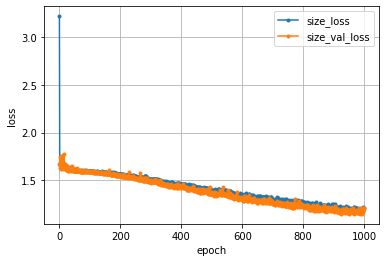

In [6]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

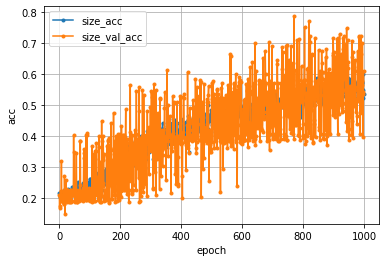

In [7]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [8]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [9]:
# 学習(位置)
epochs = 1000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 48us/step - loss: 6.0498 - accuracy: 0.0454 - val_loss: 3.3147 - val_accuracy: 0.0533
Epoch 2/1000
8108/8108 [==============================] - 0s 33us/step - loss: 3.2969 - accuracy: 0.0497 - val_loss: 3.3401 - val_accuracy: 0.0508
Epoch 3/1000
8108/8108 [==============================] - 0s 37us/step - loss: 3.3087 - accuracy: 0.0461 - val_loss: 3.3437 - val_accuracy: 0.0311
Epoch 4/1000
8108/8108 [==============================] - 0s 39us/step - loss: 3.3246 - accuracy: 0.0448 - val_loss: 3.3606 - val_accuracy: 0.0464
Epoch 5/1000
8108/8108 [==============================] - 0s 32us/step - loss: 3.3309 - accuracy: 0.0440 - val_loss: 3.2810 - val_accuracy: 0.0612
Epoch 6/1000
8108/8108 [==============================] - 0s 39us/step - loss: 3.3088 - accuracy: 0.0485 - val_loss: 3.3289 - val_accuracy: 0.0538
Epoch 7/1000
8108/8108 [==============================] - 0s 32us/step

8108/8108 [==============================] - 0s 30us/step - loss: 3.1505 - accuracy: 0.0858 - val_loss: 3.1889 - val_accuracy: 0.0543
Epoch 57/1000
8108/8108 [==============================] - 0s 29us/step - loss: 3.1606 - accuracy: 0.0756 - val_loss: 3.1722 - val_accuracy: 0.0957
Epoch 58/1000
8108/8108 [==============================] - 0s 30us/step - loss: 3.1544 - accuracy: 0.0826 - val_loss: 3.1816 - val_accuracy: 0.0617
Epoch 59/1000
8108/8108 [==============================] - 0s 32us/step - loss: 3.1542 - accuracy: 0.0798 - val_loss: 3.1806 - val_accuracy: 0.0676
Epoch 60/1000
8108/8108 [==============================] - 0s 30us/step - loss: 3.1472 - accuracy: 0.0910 - val_loss: 3.1688 - val_accuracy: 0.0607
Epoch 61/1000
8108/8108 [==============================] - 0s 37us/step - loss: 3.1507 - accuracy: 0.0812 - val_loss: 3.1660 - val_accuracy: 0.0819
Epoch 62/1000
8108/8108 [==============================] - 0s 31us/step - loss: 3.1472 - accuracy: 0.0809 - val_loss: 3.1591 -

8108/8108 [==============================] - 0s 30us/step - loss: 3.0557 - accuracy: 0.1253 - val_loss: 3.0963 - val_accuracy: 0.0952
Epoch 112/1000
8108/8108 [==============================] - 0s 30us/step - loss: 3.0583 - accuracy: 0.1178 - val_loss: 3.0706 - val_accuracy: 0.1135
Epoch 113/1000
8108/8108 [==============================] - 0s 35us/step - loss: 3.0506 - accuracy: 0.1257 - val_loss: 3.0569 - val_accuracy: 0.1445
Epoch 114/1000
8108/8108 [==============================] - 0s 31us/step - loss: 3.0464 - accuracy: 0.1301 - val_loss: 3.0763 - val_accuracy: 0.1248
Epoch 115/1000
8108/8108 [==============================] - 0s 29us/step - loss: 3.0483 - accuracy: 0.1270 - val_loss: 3.0788 - val_accuracy: 0.1174
Epoch 116/1000
8108/8108 [==============================] - 0s 38us/step - loss: 3.0458 - accuracy: 0.1270 - val_loss: 3.0816 - val_accuracy: 0.1149
Epoch 117/1000
8108/8108 [==============================] - 0s 30us/step - loss: 3.0458 - accuracy: 0.1193 - val_loss: 3.

8108/8108 [==============================] - 0s 30us/step - loss: 2.9613 - accuracy: 0.1550 - val_loss: 2.9840 - val_accuracy: 0.1297
Epoch 167/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9627 - accuracy: 0.1555 - val_loss: 2.9779 - val_accuracy: 0.1529
Epoch 168/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9584 - accuracy: 0.1606 - val_loss: 3.0012 - val_accuracy: 0.1431
Epoch 169/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9572 - accuracy: 0.1510 - val_loss: 2.9891 - val_accuracy: 0.1603
Epoch 170/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9577 - accuracy: 0.1598 - val_loss: 2.9799 - val_accuracy: 0.1199
Epoch 171/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9585 - accuracy: 0.1543 - val_loss: 2.9988 - val_accuracy: 0.1332
Epoch 172/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9547 - accuracy: 0.1476 - val_loss: 2.

8108/8108 [==============================] - 0s 30us/step - loss: 2.8870 - accuracy: 0.1711 - val_loss: 2.9351 - val_accuracy: 0.1702
Epoch 222/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8919 - accuracy: 0.1729 - val_loss: 2.9144 - val_accuracy: 0.1766
Epoch 223/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8904 - accuracy: 0.1706 - val_loss: 2.9229 - val_accuracy: 0.1613
Epoch 224/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8913 - accuracy: 0.1771 - val_loss: 2.9066 - val_accuracy: 0.1737
Epoch 225/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8786 - accuracy: 0.1787 - val_loss: 2.8685 - val_accuracy: 0.2062
Epoch 226/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8817 - accuracy: 0.1791 - val_loss: 2.9125 - val_accuracy: 0.1445
Epoch 227/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8820 - accuracy: 0.1718 - val_loss: 2.

8108/8108 [==============================] - 0s 30us/step - loss: 2.8214 - accuracy: 0.2009 - val_loss: 2.8414 - val_accuracy: 0.1806
Epoch 277/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8300 - accuracy: 0.1961 - val_loss: 2.8323 - val_accuracy: 0.2230
Epoch 278/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8137 - accuracy: 0.1924 - val_loss: 2.8418 - val_accuracy: 0.2403
Epoch 279/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8314 - accuracy: 0.1924 - val_loss: 2.8504 - val_accuracy: 0.1737
Epoch 280/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8205 - accuracy: 0.1898 - val_loss: 2.8723 - val_accuracy: 0.1963
Epoch 281/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8326 - accuracy: 0.1896 - val_loss: 2.8253 - val_accuracy: 0.1929
Epoch 282/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.8188 - accuracy: 0.1944 - val_loss: 2.

8108/8108 [==============================] - 0s 32us/step - loss: 2.7745 - accuracy: 0.2058 - val_loss: 2.8421 - val_accuracy: 0.1909
Epoch 332/1000
8108/8108 [==============================] - 0s 32us/step - loss: 2.7631 - accuracy: 0.2025 - val_loss: 2.7891 - val_accuracy: 0.1934
Epoch 333/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7718 - accuracy: 0.2108 - val_loss: 2.7924 - val_accuracy: 0.1825
Epoch 334/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7835 - accuracy: 0.1971 - val_loss: 2.7930 - val_accuracy: 0.2279
Epoch 335/1000
8108/8108 [==============================] - 0s 33us/step - loss: 2.7623 - accuracy: 0.2184 - val_loss: 2.8087 - val_accuracy: 0.1949
Epoch 336/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7721 - accuracy: 0.2066 - val_loss: 2.7923 - val_accuracy: 0.1667
Epoch 337/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7785 - accuracy: 0.1896 - val_loss: 2.

8108/8108 [==============================] - 0s 32us/step - loss: 2.7278 - accuracy: 0.2141 - val_loss: 2.7369 - val_accuracy: 0.2319
Epoch 387/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7176 - accuracy: 0.2206 - val_loss: 2.7237 - val_accuracy: 0.2264
Epoch 388/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7133 - accuracy: 0.2165 - val_loss: 2.7133 - val_accuracy: 0.2353
Epoch 389/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7335 - accuracy: 0.2126 - val_loss: 2.7394 - val_accuracy: 0.2156
Epoch 390/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7317 - accuracy: 0.2108 - val_loss: 2.7271 - val_accuracy: 0.2003
Epoch 391/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.7248 - accuracy: 0.2110 - val_loss: 2.7106 - val_accuracy: 0.2092
Epoch 392/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.7280 - accuracy: 0.2129 - val_loss: 2.

8108/8108 [==============================] - 0s 30us/step - loss: 2.6836 - accuracy: 0.2240 - val_loss: 2.6824 - val_accuracy: 0.2289
Epoch 442/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6850 - accuracy: 0.2192 - val_loss: 2.7283 - val_accuracy: 0.1978
Epoch 443/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.6860 - accuracy: 0.2109 - val_loss: 2.7250 - val_accuracy: 0.2738
Epoch 444/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6845 - accuracy: 0.2193 - val_loss: 2.7249 - val_accuracy: 0.2205
Epoch 445/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.6847 - accuracy: 0.2213 - val_loss: 2.7004 - val_accuracy: 0.2496
Epoch 446/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6702 - accuracy: 0.2363 - val_loss: 2.7333 - val_accuracy: 0.2279
Epoch 447/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6823 - accuracy: 0.2251 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.6444 - accuracy: 0.2438 - val_loss: 2.6804 - val_accuracy: 0.2181
Epoch 497/1000
8108/8108 [==============================] - 0s 32us/step - loss: 2.6456 - accuracy: 0.2415 - val_loss: 2.7388 - val_accuracy: 0.2324
Epoch 498/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.6582 - accuracy: 0.2325 - val_loss: 2.6581 - val_accuracy: 0.2057
Epoch 499/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.6488 - accuracy: 0.2257 - val_loss: 2.7362 - val_accuracy: 0.2097
Epoch 500/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.6447 - accuracy: 0.2416 - val_loss: 2.6595 - val_accuracy: 0.2551
Epoch 501/1000
8108/8108 [==============================] - 0s 33us/step - loss: 2.6392 - accuracy: 0.2299 - val_loss: 2.6870 - val_accuracy: 0.2422
Epoch 502/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6487 - accuracy: 0.2337 - val_loss: 2.

8108/8108 [==============================] - 0s 30us/step - loss: 2.6164 - accuracy: 0.2419 - val_loss: 2.6125 - val_accuracy: 0.2733
Epoch 552/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6168 - accuracy: 0.2458 - val_loss: 2.6260 - val_accuracy: 0.2407
Epoch 553/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6150 - accuracy: 0.2424 - val_loss: 2.6427 - val_accuracy: 0.2309
Epoch 554/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6164 - accuracy: 0.2377 - val_loss: 2.6908 - val_accuracy: 0.1998
Epoch 555/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6113 - accuracy: 0.2449 - val_loss: 2.6454 - val_accuracy: 0.2432
Epoch 556/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.6009 - accuracy: 0.2494 - val_loss: 2.6333 - val_accuracy: 0.2259
Epoch 557/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.6198 - accuracy: 0.2436 - val_loss: 2.

8108/8108 [==============================] - 0s 29us/step - loss: 2.5955 - accuracy: 0.2446 - val_loss: 2.6314 - val_accuracy: 0.2935
Epoch 607/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.6143 - accuracy: 0.2301 - val_loss: 2.6775 - val_accuracy: 0.2052
Epoch 608/1000
8108/8108 [==============================] - 0s 32us/step - loss: 2.6136 - accuracy: 0.2354 - val_loss: 2.5958 - val_accuracy: 0.2718
Epoch 609/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5919 - accuracy: 0.2546 - val_loss: 2.6046 - val_accuracy: 0.2136
Epoch 610/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5816 - accuracy: 0.2502 - val_loss: 2.5835 - val_accuracy: 0.2585
Epoch 611/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5802 - accuracy: 0.2551 - val_loss: 2.6158 - val_accuracy: 0.2551
Epoch 612/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5815 - accuracy: 0.2440 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.5776 - accuracy: 0.2463 - val_loss: 2.5954 - val_accuracy: 0.2146
Epoch 662/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5807 - accuracy: 0.2406 - val_loss: 2.5975 - val_accuracy: 0.2630
Epoch 663/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5553 - accuracy: 0.2638 - val_loss: 2.5718 - val_accuracy: 0.2630
Epoch 664/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5496 - accuracy: 0.2599 - val_loss: 2.5706 - val_accuracy: 0.2309
Epoch 665/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.5586 - accuracy: 0.2591 - val_loss: 2.6184 - val_accuracy: 0.2200
Epoch 666/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5699 - accuracy: 0.2448 - val_loss: 2.6053 - val_accuracy: 0.2393
Epoch 667/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5488 - accuracy: 0.2589 - val_loss: 2.

8108/8108 [==============================] - 0s 32us/step - loss: 2.5207 - accuracy: 0.2568 - val_loss: 2.5801 - val_accuracy: 0.2481
Epoch 717/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5318 - accuracy: 0.2618 - val_loss: 2.5784 - val_accuracy: 0.2511
Epoch 718/1000
8108/8108 [==============================] - 0s 33us/step - loss: 2.5521 - accuracy: 0.2599 - val_loss: 2.5452 - val_accuracy: 0.2348
Epoch 719/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5370 - accuracy: 0.2494 - val_loss: 2.6149 - val_accuracy: 0.2432
Epoch 720/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5387 - accuracy: 0.2620 - val_loss: 2.5730 - val_accuracy: 0.2284
Epoch 721/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5322 - accuracy: 0.2610 - val_loss: 2.6113 - val_accuracy: 0.1939
Epoch 722/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5363 - accuracy: 0.2553 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.4987 - accuracy: 0.2711 - val_loss: 2.5062 - val_accuracy: 0.2797
Epoch 772/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5059 - accuracy: 0.2701 - val_loss: 2.5242 - val_accuracy: 0.2699
Epoch 773/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5079 - accuracy: 0.2606 - val_loss: 2.5246 - val_accuracy: 0.2496
Epoch 774/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5022 - accuracy: 0.2644 - val_loss: 2.5184 - val_accuracy: 0.2634
Epoch 775/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5087 - accuracy: 0.2765 - val_loss: 2.5265 - val_accuracy: 0.2758
Epoch 776/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5045 - accuracy: 0.2705 - val_loss: 2.5229 - val_accuracy: 0.2343
Epoch 777/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5153 - accuracy: 0.2646 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.4960 - accuracy: 0.2724 - val_loss: 2.5262 - val_accuracy: 0.2556
Epoch 827/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4863 - accuracy: 0.2731 - val_loss: 2.5039 - val_accuracy: 0.3365
Epoch 828/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4889 - accuracy: 0.2824 - val_loss: 2.5282 - val_accuracy: 0.2230
Epoch 829/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4875 - accuracy: 0.2821 - val_loss: 2.4995 - val_accuracy: 0.2891
Epoch 830/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.5085 - accuracy: 0.2744 - val_loss: 2.5484 - val_accuracy: 0.2778
Epoch 831/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4875 - accuracy: 0.2707 - val_loss: 2.5654 - val_accuracy: 0.2600
Epoch 832/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.5078 - accuracy: 0.2700 - val_loss: 2.

8108/8108 [==============================] - 0s 30us/step - loss: 2.4682 - accuracy: 0.2847 - val_loss: 2.4832 - val_accuracy: 0.2669
Epoch 882/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4504 - accuracy: 0.2853 - val_loss: 2.4862 - val_accuracy: 0.3009
Epoch 883/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4593 - accuracy: 0.2880 - val_loss: 2.4611 - val_accuracy: 0.3340
Epoch 884/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4606 - accuracy: 0.2765 - val_loss: 2.5136 - val_accuracy: 0.2610
Epoch 885/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4603 - accuracy: 0.2744 - val_loss: 2.4728 - val_accuracy: 0.2817
Epoch 886/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4616 - accuracy: 0.2852 - val_loss: 2.4560 - val_accuracy: 0.3192
Epoch 887/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4557 - accuracy: 0.2917 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.4837 - accuracy: 0.2639 - val_loss: 2.4927 - val_accuracy: 0.2965
Epoch 937/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4455 - accuracy: 0.2874 - val_loss: 2.4775 - val_accuracy: 0.2511
Epoch 938/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4462 - accuracy: 0.2863 - val_loss: 2.5958 - val_accuracy: 0.1988
Epoch 939/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4608 - accuracy: 0.2790 - val_loss: 2.4585 - val_accuracy: 0.2723
Epoch 940/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4363 - accuracy: 0.3020 - val_loss: 2.4532 - val_accuracy: 0.3029
Epoch 941/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4301 - accuracy: 0.2933 - val_loss: 2.4518 - val_accuracy: 0.2866
Epoch 942/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4523 - accuracy: 0.2795 - val_loss: 2.

8108/8108 [==============================] - 0s 31us/step - loss: 2.4553 - accuracy: 0.2764 - val_loss: 2.5255 - val_accuracy: 0.2733
Epoch 992/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4410 - accuracy: 0.2891 - val_loss: 2.4580 - val_accuracy: 0.2807
Epoch 993/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4301 - accuracy: 0.2932 - val_loss: 2.4646 - val_accuracy: 0.2832
Epoch 994/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4193 - accuracy: 0.2887 - val_loss: 2.4298 - val_accuracy: 0.2970
Epoch 995/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4304 - accuracy: 0.2859 - val_loss: 2.4475 - val_accuracy: 0.3000
Epoch 996/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.4315 - accuracy: 0.2823 - val_loss: 2.4750 - val_accuracy: 0.2501
Epoch 997/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.4173 - accuracy: 0.2961 - val_loss: 2.

In [10]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 36us/step
Test loss: 2.5493890647530613
Test accuracy: 0.24370992183685303


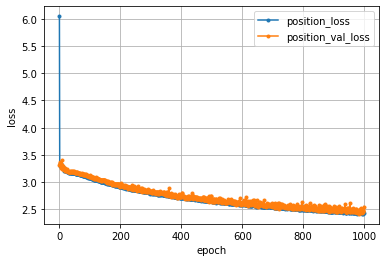

In [11]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

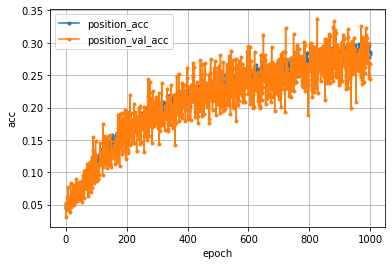

In [12]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()